# 11.1 교차검증 모델 만들기

실전에서 모델이 얼마나 잘 작동할지 평가 - 데이터 전처리 파이프라인을 만들고 모델을 훈련한 다음 교차 검증으로 평가

In [13]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터 셋을 로드
digits = datasets.load_digits()

# 특성 행렬을 만듬
features = digits.data

# 타깃 벡터를 만듬
target = digits.target

# 표준화 객체를 만듬
standardizer =StandardScaler()

# 로지스틱 회귀 객체를 만듬

logit =LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인 만들기

pipeline = make_pipeline(standardizer,logit) #(정규화,모델)순?

# k-폴드 교차검증을 만듬
kf = KFold(n_splits=10, shuffle= True , random_state=1) # 10개

# k-폴드 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증 기법
                             scoring = 'accuracy', # 평가 지표
                             n_jobs = -1 # 모든 CPU 코어 사용
                            )

# 평균을 계산
cv_results.mean()

0.9693916821849783

In [11]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
target

array([0, 1, 2, ..., 8, 9, 8])

k-폴드 교차검증(KFCV: k_fold cross-validation)에서는 데이터를 폴드(fold)라고 부르는 k개의 부분으로 나눔. k-1 개 폴드를 하나으 ㅣ훈련 세트로 합쳐모델을 훈련하고 남은 폴드를 테스트 세트처럼 사용. 이를 k번 반복. 반복마다 다른 폴드를 테스트세트로 사용. k번 반복에서 얻은 모델 성능을 평균하여 최종 성능을 산출

kf= KFold(n_splits=10,으로 설정해서 10개 폴드 


In [15]:
cv_results # 10개의 폴드의 점수를 몯 ㅜ확인.

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])



# KFCV 사용시 중점사항 

1. KFCV는 각 샘플이 다른 샘플과 독립적으로 생성 되었다고 가정(즉 데이터는 독립 동일 분포(independent identically distributed[IID])
   - 데이터가 iid면 shuffle =True가 좋음
   
2. KFCV를 사용해 분류기를 평가할 때, 각 타깃 클래스의 샘플이 거의 같은 비율로 폴드에 담기는 것이 좋음(계층별 k-폴드) ex)성별 타깃 벡터 중에서 80% 샘플이 남성이라면 각 폴드도 80% 남성과 20% 여성 샘플로 이룸. 사이킷런에서는 KFold 클래스를 StratifiedKFoldf로 바꾸어 계층별 k-폴드 교차검증을 수행

3. 검증 세트나 교차 검증을 사용할 때 훈련 세트에서 데이터를 전처리하고 이 변환을 훈련 세트와 테스트 세트에 적용하는 것ㅇ ㅣ중요!
 - ex) 표준화 객체 standardizer의 fit 메서드를 호출하여 훈련 세트의 평균과 분산을 계산. 그다음 이 변환을(transform 메서드를 사용해) 훈련세트와 테스트 세트에 모두 적용.


In [19]:
# 라이브러리를 임포트
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듬
features_train, features_test, target_train,target_test = train_test_split(features, target,test_size=0.1, random_state=1) 
# 여기서 features와 target은 데이터  ex 데이터 프레임 슬라이싱 해논거 X,Y

In [18]:
features_train

array([[ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  2.,  0.],
       [ 0.,  0., 10., ...,  8.,  6.,  0.],
       ...,
       [ 0.,  0.,  7., ..., 13.,  2.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.]])

In [21]:
# 훈련 셋으로 standarizer의 fit 메서드를 호출
standardizer.fit(features_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
# 훈련 세트와 테스트 세트 모두 적용
features_train_std = standardizer.transform(features_train)
features_test_std=standardizer.transform(features_test)

이렇게 하는 이유는 테스트 세트를 모르는 척하기 위해서 임. 이 전처리 객체를 훈련세트와 테스트 세트에 있는 모든 샘플로 훈련한다면 테스트 세트의 정보가 훈련 세트로 유출 됌. 이 규칙은 선택 같은 모든 전처리 단계에 적용.

사이키런의 pipeline 패키지는 교차검증 기법을 사용할 때 이 규칙을 손쉽게 구현. 먼저 데이터를 전처리(ex Standardizer)하고 모델을 훈련(ex 로지스틱 회귀)하는 파이프라인 생성

In [27]:
pipeline= make_pipeline(standardizer,logit)
# = pipeline = make_pipeline(StandardScaler(),LogisticRegression())

In [28]:
pipeline

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [30]:
# k폴드 교차 검증 수행

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf, # 위에 kf 교차검증
                            scoring='accuracy',
                            n_jobs= -1) # 모든 CPU 코어 사용


In [31]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

-참고

모든 통계학자가 교차검증을 알아야만 하는 이유(http://bit.ly/2Fzhz6X)

잘못된 교차검증(http://bit.ly/2FzfIiw)

shuffleSplit는 반복 횟수에 상관없이 훈련 폴드와 테스트 폴드 크기를 임의로 지정할 수 있음. train_size,test_size 매개변수에는 사용할 샘플 개수 또는 비율을 입력. 반복마다 랜덤하게 분할하기 때문에 하나의 샘플이 여러 번 테스트 폴드에 포함될 수 있음. 계층별 교차검증을 위한 StratifiedShuffleSplit도 있음. 다음 코드는 훈련 50%, 테스트 폴드 20%를 사용해 10번 반복하는 예

In [43]:
from sklearn.model_selection import ShuffleSplit
# ShuffleSplit 분할기 생성
ss = ShuffleSplit(n_splits = 10, train_size= 0.5, test_size=0.2, random_state= 42)

# 교차 검증 수행

cv_results22 = cross_val_score(pipeline,
                            features,
                            target,
                            cv=ss,
                            scoring='accuracy',
                            n_jobs = -1)

print(cv_results22)
print(cv_results22.mean())

[0.96111111 0.98333333 0.95555556 0.96666667 0.97777778 0.96666667
 0.95       0.95       0.95277778 0.96666667]
0.9630555555555554


In [44]:
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기 생성
rkf = RepeatedKFold(n_splits= 10, n_repeats= 5 , random_state= 42)

# 교차 검증 수행

cv_results33 = cross_val_score(pipeline,
                              features,
                              target,
                              cv=rkf,
                              scoring='accuracy',
                              n_jobs= -1)

cv_results33 # RepeatefKFold 가 10개로 스필릿하고 5번 반복이라 50개

array([0.97777778, 0.97777778, 0.96666667, 0.95555556, 0.97222222,
       0.96666667, 0.96666667, 0.97206704, 0.96648045, 0.93296089,
       0.98888889, 0.97777778, 0.97222222, 0.97222222, 0.95      ,
       0.96666667, 0.96666667, 0.98324022, 0.98324022, 0.96648045,
       0.97777778, 0.95      , 0.97222222, 0.98888889, 0.97777778,
       0.95555556, 0.95555556, 0.98882682, 0.97765363, 0.96648045,
       0.98333333, 0.95555556, 0.96111111, 0.97777778, 0.95555556,
       0.96111111, 0.97777778, 0.97765363, 0.96648045, 0.96648045,
       0.97222222, 0.97777778, 0.95555556, 0.97222222, 0.96111111,
       0.98888889, 0.96111111, 0.93296089, 0.98882682, 0.98882682])

In [45]:
cv_results33.mean()

0.9695065176908755

In [46]:
# 검증 개수를 확인
len(cv_results33)

50

# 11.2 기본 회귀모델 만들기

다른 모델과 비교하기 위해 간단한 기본 회귀 모델 생성 -사이킷런의 DummyRegressor를 사용해 기본 모델로 사용할 간단한 더미 모델 생성

In [1]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터를 로드
boston = load_boston()

# 특성 생성 ########################
features, target = boston.data, boston.target

# 훈련 세트와 테스트 세트를 나눔

features_train, features_test, target_train,target_test = train_test_split(features,target, train_size=0.5,test_size=0.2,random_state=0)

In [2]:
# 더미 회귀 모델 생성

dummy = DummyRegressor(strategy='mean')

# 모델 학습
dummy.fit(features_train,target_train)

# R^2 점수를 계산???
dummy.score(features_test,target_test)

-0.00037548940353260285

In [69]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터를 로드
boston = load_boston()

# 특성 생성 ########################
features, target = boston.data, boston.target

# 훈련 세트와 테스트 세트를 나눔

features_train, features_test, target_train,target_test = train_test_split(features,target,random_state=0)

In [70]:
# 더미 회귀 모델 생성

dummy = DummyRegressor(strategy='mean')

# 모델 학습
dummy.fit(features_train,target_train)

# R^2 점수를 계산???
dummy.score(features_test,target_test)

-0.001119359203955339

In [71]:
print(features_train.shape,'\t', features_test.shape, '\t', target_train.shape, '\t', target_test.shape )

(379, 13) 	 (127, 13) 	 (379,) 	 (127,)


다른 모델을 훈련하고 평가하여 성능 점수를 비교


In [74]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()

ols.fit(features_train,target_train)

ols.score(features_test,target_test)

0.6354638433202114

 DummyRegressor 클래스는 실제 모델과 비교하기 위해 사용할 수 있는 매우 간다한 모델 생성. 기존 제품이나 시스템의 단순한 예측방식을 흉내 내는데 종종 사용. 예로 모든 새로운 사용자는 특성에 상관없이 첫 달에 100달러를 사용할 것이라고 가정하도록 애초부투터 시스템에 하드코딩되어 있다고 가정하면 기본 모델로 삼으면 머신러닝 방식을 사용햇을 때 장점을 명확히 확인 가능 !!
 
 
 DummyRegressor 클래스는 strategy 매개변수를 사용해 예측 방법을 지정. 훈련 세트의 평균 또는 중간값을 사용. 또한 strategy를 constant로 지정하고 constant 매개 변수를 사용하면 모든 샘플에 대해 일정한 값으로 예측하는 더미 회귀 모델을 만들 수 있음
 
 strategy가 mean일 때 평균값으로 예측하고 median일 대 중간값으로 예측 strategy='quantile'로 짖어하면 quantile 매개변수에 지정한 분위값을 예측으로 사용. quantile 매개변수에는 0과 1사이의 실수값을 지정하며 0.5일 대 중간값과 같고 0이면 최솟값 1이면 최댓값!

In [75]:
# 모든 샘플에 대해 20으로 예측하는 더미 회귀모델 생성.

clf = DummyRegressor(strategy ='constant', constant=20)
clf.fit(features_train,target_train)

clf.score(features_test,target_test)

-0.06510502029325727

In [78]:
clf = DummyRegressor(strategy ='quantile', quantile=1.0)
clf.fit(features_train,target_train)

clf.predict(features_test)

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

In [83]:
target_train.max()

50.0

# 11.3 기본 분류 모델 만들기

다른 모델과 비교하기 위해 간단한 기본 회귀모델 생성 -DummyClassifier

In [88]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X,Y = iris.data, iris.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state= 0)

# 더미 분류모델 생성
dummy = DummyClassifier(strategy='uniform', random_state= 1)

# 모델 학습
dummy.fit(X_train,Y_train)

# 모델 평가
dummy.score(X_test,Y_test)

0.42105263157894735

In [91]:
'''
더미분류모델을 랜덤포레스트와 비교
'''
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier()

RFclassifier.fit(X_train,Y_train)
RFclassifier.score(X_test,Y_test)

0.9736842105263158

분류 모델의 성능을 측정하는 일반적인 방법은 랜덤한 추측보다 얼마나 더 나은지 비교하는 것입니다. 사이킷런의 DummyClassifier를 사용하면 이런 비교를 쉽게 할 수 있음. strategy 매개변수는 예측값을 생성하는 여러 가지 옵션을 제공함. 전형적으로 많이 사용하는 두 가지 전략이 있음. 


첫 번째는 stratified 옵션은 훈련 세트에 있는 타깃 벡터의 클래스 비율에 비례하는 예측을 만듬.(즉, 훈련 세트에서 샘플의 20%가 여성이라면 DummyClassifier는 20%를 여성이라고 예측 

두 번째는 uniform 옵션은 클래스 비중이 균등하도록 랜덤하게 예측. 예를 들어 샘플의 20%가 여성이고 80%가 남서일 때 uniform 옵션은 50% 여성, 50% 남성으로 예측

- 사이킷런 문서:DummyClassifier(http://bit.ly/2Fr178G)

In [92]:
'''
strategy에 자주 사용하는 또다른 옵션은 most_frequent. 이옵션은 무조건 훈련 세트에서 가장 많은 타깃 레이블로 예측을 만듬.
'''

dummy=DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,Y_train)

dummy.predict(X_test)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
import numpy as np
# 훈련 세트의 타깃 개수를 확인
np.bincount(Y_train)

array([37, 34, 41], dtype=int64)

# 11.4 이진 분류기의 예측 평가하기 (p288 중요!!)

-훈련된 분류 모델의 품질을 평가 - 사이킷런의 cross-val_score 함수를 사용해 교차검증을 수행. scoring 매개 변수에 'accurcy'정확도,
'precision' 정밀도, 'recall':재현율, F1 등이 있음. 

In [99]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 특성 행렬과 타깃 벡터 생성
X,y = make_classification(n_samples =10000, n_features=3, n_informative=3, n_redundant=0, n_classes =2, random_state=1)

# 로지스틱 회귀 모델 생성.
logit = LogisticRegression()

# 정확도를 사용해 교차검증을 수헹

cv_results= cross_val_score(logit,X,y,scoring='accuracy',n_jobs=-1) # 위에 cv= kf 나 이런거 교차검증 기법 설정한거랑 비교!!
cv_results

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [100]:
cross_val_score(logit,X,y,scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [101]:
cross_val_score(logit,X,y,scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [102]:
X.shape

(10000, 3)

In [103]:
y.shape

(10000,)

In [104]:
'''
F1 = 2 * (정밀도 * 재현율) /(정밀도 + 재현율)

!!!!!! 이는 진짜 양성 레이블을 가진 샘플을 양성으로 성공적으로 예측한 정도를 측정.

F1은 정밀도와 재현율을 비교적 동등학게 취급해 이 둘 사이의 균형을 표현. 
'''

cross_val_score(logit,X,y,scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

 # cross_val_score를 사용하는 대신 진짜 y 값과 예측한 y 값이 있으면 직접 정확도와 재현율을 계산할 수 있음 !!!!!!!!!!!  즉, Y_test, Y_pred가 있으면 !!!


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test, Y_train,Y_test = train_test_split(X,y,test_size = 0.1, random_state=1)

# 테스트 셋의 예측을 만듭!!!!!!!!!!!
y_hat = logit.fit(X_train,Y_train).predict(X_test)

# 정확도를 계산
accuracy_score(Y_test,y_hat)

0.947

- 정확도의 역설(http://bit.ly/2FxTpx0)

cross_val_score 함수의 cv 매개변수를 지정하지 않으면 회귀일 때는 KFold, 분류 일때는 StratifiedKFold 분할기를 사용. cv 매개변수에 정수를 입력해 기본 분할기의 폴드 수를 지정 가능.

In [113]:
'''
cross_validate 메서드는 cross_val_score 와 사용법이 매우 비슷하짐나 scoring 매개변수에 여러 개의 평가지표를 추가 가능

scikit-learn ==0.22 에서 cross_val_score와 cross_validate의 cv 기본값이 3에서 5로 변경됌.


'''

from sklearn.model_selection import cross_validate

cross_validate(logit,X,y, scoring=['accuracy','precision'])

{'fit_time': array([0.01835179, 0.01835132, 0.01785779, 0.0148797 , 0.01537395]),
 'score_time': array([0.00347257, 0.00148845, 0.00148606, 0.00198555, 0.00148821]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

# 11.5 이진 분류기 임곗값 평가하기 (중요!!!!!!!!!!!!!!!!)


이진 분류기를 여러 가지 확률 임곗값으로 평가 - ROC 곡 선을 이용해서 - ROC는 확률 임곗값(즉 어떤 샘플을 한 클래스로 예측할 확률)마다 진짜 양성과 거짓 양성 개수를 비교. roc_curve 함수를 사용해 임곗값마다 진짜 양성과 거짓 양성을 계산해 그래프를 그림

In [116]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터 생성
X,Y = make_classification(n_samples=10000,n_features=10,n_classes= 2, n_informative=3,random_state=3)
print(X.shape)
print(Y.shape)

(10000, 10)
(10000,)


In [117]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size =0.1, random_state = 1)

logit =LogisticRegression()

logit.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 예측 확률을 계산 !!

Y_probabilities1 =logit.predict_proba(X_test)

## 이거 대로하면 앞에는 loss고 뒤에는 evaluation임!!!??

In [133]:
Y_probabilities1 ## 이거 대로하면 앞에는 loss고 뒤에는 evaluation임!!!?? ㄴㄴ 라벨 0일 확률 이고 라벨 1일 확률 각각 그래서 더하면 1

array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       ...,
       [0.46720208, 0.53279792],
       [0.67447765, 0.32552235],
       [0.16098342, 0.83901658]])

In [134]:
Y_probabilities1.shape

(1000, 2)

In [136]:
logit.predict_proba(X_test)[:,1]

array([1.31084671e-01, 5.36844586e-01, 9.66046449e-01, 6.03902173e-01,
       3.33293891e-01, 9.29492836e-01, 3.19003239e-02, 1.56032410e-01,
       6.70107768e-01, 8.73431380e-02, 8.30474338e-01, 8.69109075e-02,
       3.33804458e-01, 3.63626066e-02, 6.81802533e-01, 1.73373620e-01,
       7.22134622e-01, 4.87326359e-01, 2.61709037e-02, 1.16288984e-02,
       7.62379212e-01, 1.67309975e-01, 6.60844828e-01, 5.18592599e-02,
       4.94697677e-01, 3.45358555e-02, 6.22134861e-02, 3.20343218e-02,
       9.81785826e-01, 8.08003286e-01, 9.61497265e-01, 2.59031885e-02,
       8.73104226e-01, 7.64561385e-01, 9.88453045e-01, 7.49357769e-01,
       9.48606507e-02, 8.14189305e-02, 6.19103863e-02, 5.78306854e-02,
       1.30000494e-01, 5.30466915e-02, 4.62585839e-01, 9.61724504e-01,
       6.44319743e-02, 8.41273019e-01, 6.02235514e-01, 5.66586488e-02,
       2.91293386e-01, 3.69804799e-02, 1.67257479e-02, 3.34332577e-01,
       1.14989723e-01, 1.21588312e-01, 9.97248833e-01, 9.92123682e-01,
      

In [137]:
Y_probabilities2 =logit.predict_proba(X_test)[:,1] ### 이거로 아래 코드 계속사용

In [138]:
Y_probabilities2.shape

(1000,)

In [140]:
# 진짜 양성 비율과 거짓 양성 비율을 계산

false_positive_rate, true_positive_rate, threshold =roc_curve(Y_test,Y_probabilities2)

In [141]:
print(false_positive_rate.shape)
print(false_positive_rate)

(236,)
[0.         0.         0.         0.00196078 0.00196078 0.00392157
 0.00392157 0.00588235 0.00588235 0.00784314 0.00784314 0.00980392
 0.00980392 0.01372549 0.01372549 0.01568627 0.01568627 0.01764706
 0.01764706 0.01960784 0.01960784 0.02352941 0.02352941 0.0254902
 0.0254902  0.02745098 0.02745098 0.02941176 0.02941176 0.03137255
 0.03137255 0.03333333 0.03333333 0.03529412 0.03529412 0.0372549
 0.0372549  0.03921569 0.03921569 0.04117647 0.04117647 0.04313725
 0.04313725 0.04509804 0.04509804 0.04705882 0.04705882 0.05098039
 0.05098039 0.05294118 0.05294118 0.05490196 0.05490196 0.05686275
 0.05686275 0.05882353 0.05882353 0.06078431 0.06078431 0.0627451
 0.0627451  0.06470588 0.06470588 0.06666667 0.06666667 0.06862745
 0.06862745 0.07058824 0.07058824 0.07254902 0.07254902 0.0745098
 0.0745098  0.07843137 0.07843137 0.08431373 0.08431373 0.08627451
 0.08627451 0.08823529 0.08823529 0.09019608 0.09019608 0.09607843
 0.09607843 0.09803922 0.09803922 0.1        0.1        0.1

In [142]:
print(true_positive_rate.shape)
print(true_positive_rate)

(236,)
[0.         0.00204082 0.13265306 0.13265306 0.15102041 0.15102041
 0.17346939 0.17346939 0.20204082 0.20204082 0.21428571 0.21428571
 0.24285714 0.24285714 0.28163265 0.28163265 0.31836735 0.31836735
 0.35714286 0.35714286 0.38163265 0.38163265 0.38979592 0.38979592
 0.39183673 0.39183673 0.40612245 0.40612245 0.41632653 0.41632653
 0.44693878 0.44693878 0.45918367 0.45918367 0.46326531 0.46326531
 0.46938776 0.46938776 0.48163265 0.48163265 0.5122449  0.5122449
 0.51428571 0.51428571 0.54489796 0.54489796 0.56326531 0.56326531
 0.56530612 0.56530612 0.57755102 0.57755102 0.57959184 0.57959184
 0.5877551  0.5877551  0.60408163 0.60408163 0.60612245 0.60612245
 0.6122449  0.6122449  0.61428571 0.61428571 0.61836735 0.61836735
 0.62244898 0.62244898 0.62857143 0.62857143 0.63469388 0.63469388
 0.64285714 0.64285714 0.64693878 0.64693878 0.66734694 0.66734694
 0.69795918 0.69795918 0.7        0.7        0.70816327 0.70816327
 0.71020408 0.71020408 0.71632653 0.71632653 0.72244898 

In [143]:
print(threshold.shape)
print(threshold)

(236,)
[1.99987596e+00 9.99875962e-01 9.78303915e-01 9.76955996e-01
 9.72699917e-01 9.72451311e-01 9.66704690e-01 9.66457128e-01
 9.61738570e-01 9.61724504e-01 9.59729627e-01 9.59562955e-01
 9.54439793e-01 9.54037246e-01 9.40166879e-01 9.40090388e-01
 9.29492836e-01 9.28580982e-01 9.18191768e-01 9.17811297e-01
 9.11725464e-01 9.10909007e-01 9.06145354e-01 9.04564055e-01
 9.03656101e-01 9.03215427e-01 8.99536063e-01 8.98324986e-01
 8.95462584e-01 8.94681566e-01 8.73769332e-01 8.73104226e-01
 8.70378724e-01 8.69694241e-01 8.67236558e-01 8.66098235e-01
 8.57540873e-01 8.56831418e-01 8.51667017e-01 8.51162022e-01
 8.35332844e-01 8.35078794e-01 8.34655067e-01 8.33496875e-01
 8.19152981e-01 8.18913388e-01 8.08003286e-01 8.06387038e-01
 8.06385211e-01 8.05857503e-01 7.89820429e-01 7.86661590e-01
 7.86563812e-01 7.85305403e-01 7.81339428e-01 7.81098189e-01
 7.75068977e-01 7.74861661e-01 7.74763230e-01 7.72937436e-01
 7.68129230e-01 7.67714926e-01 7.66731396e-01 7.66512083e-01
 7.64561385e-01 7

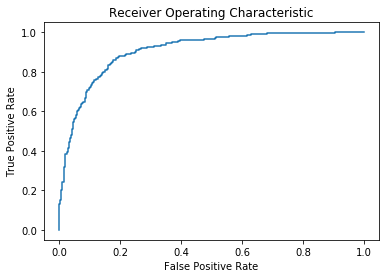

In [145]:
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

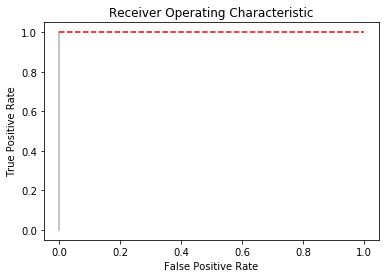

In [157]:
plt.title("Receiver Operating Characteristic")
plt.plot([0, 0], [1, 0] , c=".7")
#plt.plot([1, 1] , c=".7")
plt.plot([0,1],[1,1], 'r--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

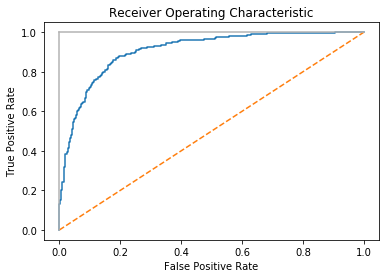

In [144]:
# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

!!! ROC 곡선의 TPR 과 FPR은 정밀도 재현율이 아님 근데, TRP은 재현율임!!!!!! !!!   진짜 양성비율 TPR = (진짜 양성)/ (진짜 양성 + 거짓 음성) 이고, ,거짓 양성 비율 FPR은 = (거짓 양성)/ (거짓 양성 + 진짜 음성)

In [3]:
'''
지금까지 예측값을 기반으로 모델을 평가 but, 많은 머신러닝 알고리즘들은 확률을 기반으로 예측값을 만듬. 즉, 모든 샘플은 각 클래스에 속할 명
시적인 확률이 주어짐. predict_proba 메서드를 사용해 해결에 있는 첫 번째 샘플에 대한 예측확률을 확인 간으.
'''

'\n지금까지 예측값을 기반으로 모델을 평가 but, 많은 머신러닝 알고리즘들은 확률을 기반으로 예측값을 만듬. 즉, 모든 샘플은 각 클래스에 속할 명\n시적인 확률이 주어짐. predict_proba 메서드를 사용해 해결에 있는 첫 번째 샘플에 대한 예측확률을 확인 간으.\n'

In [173]:
# 예측 확률을 계산

logit.predict_proba(X_test)


array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       ...,
       [0.46720208, 0.53279792],
       [0.67447765, 0.32552235],
       [0.16098342, 0.83901658]])

In [175]:

logit.predict_proba(X_test[:1])


array([[0.86891533, 0.13108467]])

In [177]:
# classes_를 사용해 클래스를 확인가능
logit.classes_           

array([0, 1])

여기서 첫 번째 샘플은 음성 클래스(0)가 될 가능성이 87% 정도이고 양성 클래스(1)가 될 가능성은 13% 정도입니다. 기본적으로 사이킷 런은 확률이 0.5(임곗값)보다 크면 양성 클래스로 예측. 종종 실제 필요에 의해 중간값볻 ㅏ다른 임곗값을 사용해 모델을 편향되게 만드렁야 하는데 예를 들면 거짓 양성이 회사에 매우 큰 비용을 치르게 한다면 확률 임곗값이 높은 모델을 선호함. 

ROC곡선은 확률 임곗값마다 TPR과 FPR을 나타냄 예를 들어 해결에서 임곗값이 0.5일 때 TPR은 0.81이고 FPR은 0.15

In [178]:
print("임곗값:",threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:",false_positive_rate[116])

임곗값: 0.06651767287264236
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725


In [180]:
'''
임곗값을 80%로 증가시키면(즉,샘플을 양성으로 예측하기 위해 모델이 확신하는 정도를 증가시키면 TPR과 FPR이 크게 감소!!)
'''

print("임곗값:",threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:",false_positive_rate[5])


''' 양성 클래스로 예측하기 위한 기준을 높였기 때문에 모델이 많은 양성 샘플을 구분 못함.(낮은 TPR)
또한 양성클래스로 예측되는 음성 샘플의 수를 감소시킴(FPR을 낮춤)'''



임곗값: 0.03269393130329915
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.00392156862745098


' 양성 클래스로 예측하기 위한 기준을 높였기 때문에 모델이 많은 양성 샘플을 구분 못함.(낮은 TPR)\n또한 양성클래스로 예측되는 음성 샘플의 수를 감소시킴(FPR을 낮춤)'

TPR과 FPR 간의 트레이드 오프를 시각화하는 것 외에 ROC 곡선은 일반적인 모델 지표로 사용. 이런 이유로 ROC 곡선 아래 면적(AUCROC)을 계산해 모든 가능한 임곗값에서 모델의 전반적인 품질을 평가!!!!!!!!!!!!! AUCROC이 1에 가까울수록 더 좋은 모델임. 

sklearn에서 roc_auc_score를 이용해 AUCROC를 계산!!

In [181]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,Y_probabilities2)

0.9073389355742297

- 파이썬과 R에서 ROC곡선(http://bit.ly/2FuqoyV)
- ROC 곡선 아래 면적(http://bit.ly/2FxTrl6)

# 정밀도 -재현율 곡선!!!!!!!! (vs ROC 커브는 재현율 FPR 곡선)

ROC 곡선은 TPR(재현율)과 FPR(거짓 양성 비율)을 사용 vs 정밀도와 재현율로 평가하는 정밀도-재현율 곡선 precision_recall_curve 함수를 사용해 임계점마다 정밀도와 재현율을 계산하여 정밀도 -재현율 곡선을 그림.

In [158]:
from sklearn.metrics import precision_recall_curve

# 진짜 양성 비율과 거짓 양성 비율을 계산

precision, recall, threshold = precision_recall_curve(Y_test,Y_probabilities2)

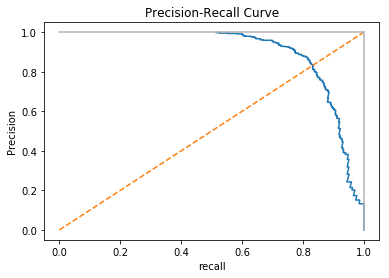

In [159]:
plt.title("Precision-Recall Curve")
plt.plot(precision,recall)

plt.plot([0,1], ls='--')
plt.plot([1,1], c='.7')
plt.plot([1,1],[1,0],c='.7')
plt.xlabel('recall')
plt.ylabel('Precision')
plt.show()

정밀도 재현율곡선에서는 오른쪽 맨 위에 가꺼ㅏ울 수록 좋은 모델. 이 곡선의 아래 면적을 평균 정밀도라고 부르며 average_precision_score 함수를 사용해 계산가능.



In [160]:
from sklearn.metrics import average_precision_score

average_precision_score(Y_test,Y_probabilities2) ## 케라스에서 딥러닝으로 예측한것은 X_test로 하는데 여기는 target 데이터 이용?

0.8984128719848977

다음처럼 교차검증 함수의 scoring 매개변수에 ROCAUC와 평균 정밀도를 평가 지표로 지정할 수 있음.



In [168]:
cv_result=cross_validate(logit,X,Y,scoring=['average_precision','roc_auc'])
cv_result

{'fit_time': array([0.01780391, 0.01385593, 0.01335526, 0.01407242, 0.01587129]),
 'score_time': array([0.00300837, 0.0030086 , 0.00301552, 0.00298071, 0.00248098]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ])}

In [169]:
cv_result=cross_validate(logit,X,Y,scoring=['roc_auc','average_precision'])
cv_result

{'fit_time': array([0.01732087, 0.01583314, 0.01354599, 0.01389527, 0.01528001]),
 'score_time': array([0.00252056, 0.00297618, 0.00248003, 0.00248003, 0.00251412]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ])}

In [167]:
cv_result['test_average_precision']

array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])

In [170]:
cv_result['test_average_precision'].mean()

0.902450351338447

# 11.6 다중클래스 분류기 예측 평가하기

세 개 이상의 클래스를 예측하는 모델의 성능을 평가 - 두 개 이상의 클래스를 다룰 수 있는 평가 지표로 교차검증을 수행

균형한 클래스( ex. 타깃 벡터의 클래스에 속한 샘플 개수가 거의 동일할 때)에서는 정확가 가장 용이한 평가지표 but, 불균형 클래스는 다른 평가지표를 사용하는게 나음. ex) 앞의 'precision': 정밀도, 'recall':재현율, 'F1' 

클래스가 두 개 이상일 때로 확장. n_classes >=3

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X,Y = make_classification(n_samples=10000,n_features=3, n_informative=3,n_redundant= 0, n_classes=3, random_state=1)# 클래스 3개 다중클래스

logit = LogisticRegression()

cross_val_score(logit,X,Y,scoring='accuracy', n_jobs=-1)

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

  _macro는 클래스별 평가 점수를 평균하는 방법을 나타냄
    
    
- macro: 각 클래스를 동등한 가중치로 클래스별 측정 점수를 평균.
 
- weighted : 샘플 개수에 비례하여 각 클래스별 측정 점수를 평균
    
- micro : 클래스별로 TP,TN, FP, FN을 모두 더하여 계산 (- accuracy)


In [188]:
# 마크로 평균 F1 점수를 사용해 교차검증을 수행
cross_val_score(logit,X,Y,scoring='f1_macro', n_jobs=-1)

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In [189]:
cross_val_score(logit,X,Y,scoring='f1_weighted', n_jobs=-1)

array([0.84063166, 0.8289688 , 0.82630601, 0.8151928 , 0.81998327])

In [191]:
cross_val_score(logit,X,Y,scoring='f1_micro', n_jobs=-1)

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [192]:
cross_val_score(logit,X,Y,scoring='f1_micro')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

# 11.7 분류기 성능 시각화하기

테스트 데이터의 예측 클래스와 진짜 클래스를 바탕으로 모델의 품질을 시각적으로 비교. - 오차 행렬을 사용해 예측 클래스와 진짜 클래스를 비교

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import pandas as pd

# 데이터를 로드
iris= datasets.load_iris()

X= iris.data
Y= iris.target

# 클래스 이름의 리스트를 만듬. 

class_names = iris.target_names



In [202]:
print(class_names)

['setosa' 'versicolor' 'virginica']


In [204]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,random_state=1)

classifier = LogisticRegression()

# 모델을 훈련하고 예측 결과를 계산

Y_predicted = classifier.fit(X_train,Y_train).predict(X_test)

# 오차 행렬을 생성

matrix = confusion_matrix(Y_test,Y_predicted)
matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [206]:
# 데이터 프레임생성

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
dataframe

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


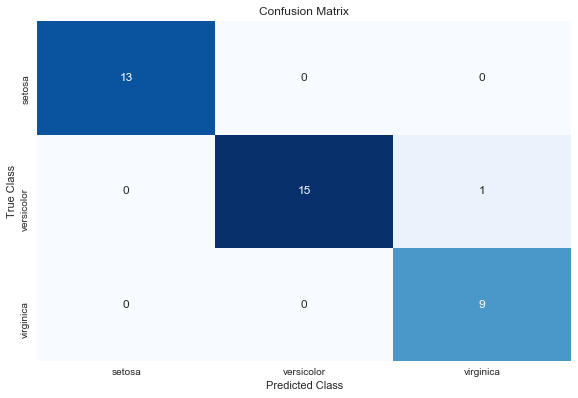

In [211]:
# 히트맵 생성

sns.heatmap(dataframe, annot=True,cbar=None, cmap="Blues")  # 데이터 프레임 사용!
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

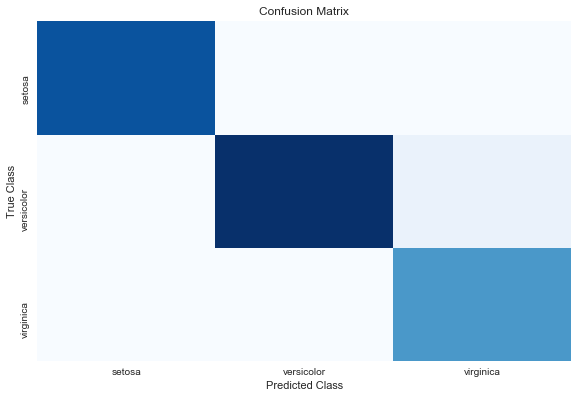

In [216]:

sns.heatmap(dataframe, annot=False # annotation인듯
            ,cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


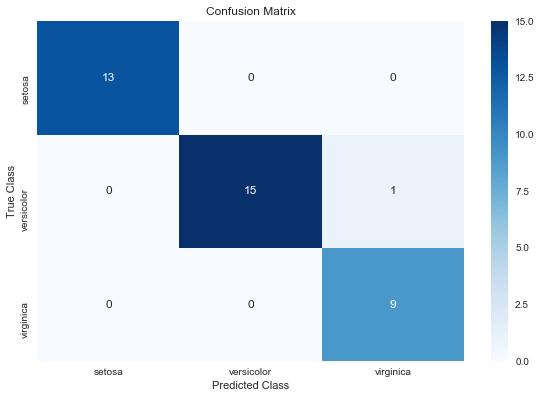

In [217]:

sns.heatmap(dataframe, annot=True, # annotation인듯
         
            cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


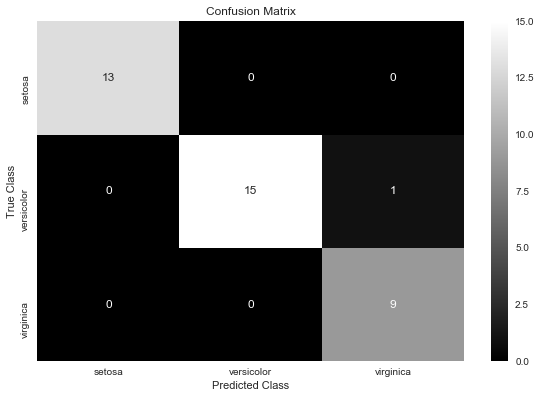

In [220]:

sns.heatmap(dataframe, annot=True,
            # annotation인듯
         
            cbar=2,cmap="gray")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


오차 행렬에서 row는 진짜 클래스 col은 예측 클래스 즉 대각선이 값이 제대로 된 예측을 한거 !! 

오차 행렬에 대한 세가지 언급

1. 완벽한 모델은 대각선에만 값이 있고 나머지는 모두 0. 나쁜 모델은 모든 셀에 고르게 샘플들이 퍼짐.

2. 오차 행렬은 모델이 나쁘다는 것뿐만 아니라 어떻게 나쁜지도 알려줌. 즉 잘못 분류된 패턴을 확인 가능 
 ex) 대각선 아닌부분 잘못 분류된 패턴 확인

3. 오차 행렬은 다중 클래스 환경에도 잘 작동.(but,타깃 벡터에 백만 개의 클래스가 있다면 오차 행렬을 그래프로 나타내기 어려움)










- 오차 행렬(http://bit.ly/2FuGKaP)
- 사이킷런 문서: 오차 행렬(http://bit.ly/2DmnICk)

# 11.8 회귀 모델 평가하기

회귀 모델의 성능을 평가 - 평균 제곱 오차 MSE를 사용

In [233]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 특성 행렬과 타깃 벡터 생성

X,Y = make_regression(n_samples=10000, n_features=3,n_informative=3, n_targets=1,noise=50, coef=False, random_state=1)

ols =LinearRegression()

# 음의 MSE를 사용한 교차검증을 수행

cross_val_score(ols,X,Y, scoring= 'neg_mean_squared_error')


array([-2460.57358849, -2560.52760428, -2477.0182585 , -2500.1031327 ,
       -2542.75387793])

In [234]:
# 자주 사용하는 또 다른 회귀 지표 결정계수 R2 

cross_val_score(ols,X,Y, scoring='r2')

array([0.7618103 , 0.75118402, 0.75675456, 0.75739721, 0.76190233])

- 평균 제곱 오차(http://bit.ly/2HgALnc)
- 결정계수(http://bit.ly/2HjW7Qn)

# 11.9 군집 모델 평가하기

데이터를 클러스터로 모으기 위해 비지도 학습 알고리즘을 사용  - 군집을 평가하는 한 가지 방법은 클러스터의 품질을 측정하는 실루엣 계수(silhouette coefficients)

In [237]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 행렬을 생성

features, _ = make_blobs(n_samples = 1000, n_features= 10, centers=2, cluster_std =0.5, shuffle = True, random_state=1)

_



array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [238]:
features

array([[-1.69447144,  3.23887889, -5.90612526, ...,  1.84068368,
        -7.95912024, -6.33972358],
       [-1.46528223,  3.13504785, -5.54488655, ...,  0.46824734,
        -7.31223947, -6.33047766],
       [-1.38723852,  3.78863535, -6.15814893, ...,  2.0206174 ,
        -7.53142717, -5.60147422],
       ...,
       [-1.07462939,  3.27468549, -5.79053892, ...,  0.45251815,
        -7.15140785, -6.36095282],
       [-1.45810635,  4.57155117, -6.12525727, ...,  1.32757808,
        -7.12927195, -5.49113664],
       [-1.84629813,  3.74593658, -9.96694552, ..., -3.26826911,
        -1.94726487,  1.51474148]])

In [240]:
# K-Means 를 사용해 데이터를 클러스터링 하고 클래스를 예측

model = KMeans(n_clusters=2, random_state = 1).fit(features)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [242]:
# 예측된 클래스

target_predicted = model.labels_
target_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [245]:
# 모델을 평가

silhouette_score(features,target_predicted)

0.8916265564072142

지도 학습 모델 평가는 타깃 벡터의 정답값과 예측값(예를 들면,클래스나 실숫값)을 비교. 군집 방법을 사용하는 대부분의 이유는 타깃 벡터가 없기 때문. 하지만 여러가지 군집 평가 지표는 타깃 벡터가 필요. 타깃 벡터를 가지고 있을 때 군집 같은 비지도 학습 방법을 사용하면 역효과.

타깃 벡터가 없기 때문에 예측과 정답을 평가할 수 없지만 군집 자체의 특성을 평가할 수 있음. 클러스터 내의 샘플 간의 거리는 가깝고(즉, 조밀한 클러스터) 클러스터 간 거리는 먼것(즉, 잘 구분된 클러스터)이 좋은 클러스터. 실루엣 계수는 이 두 특성을 측정한 하나의 수치를 제공. 

silhouette_score 함수의 반환값은 모든 샘플의 실루엣 계수를 평균한 값. 실루엣 계수의 범위는 -1과 1 사이. 1은 조밀하고 잘 구분되는 클러스터를 의미.

사이킷런 문서: sihouette_score(http://bit.ly/2BEVQV5)

# 11.10 사용자 정의 평가 지표 만들기


자신만의 지표를 사용해 모델을 평가 - 평가 방법을 함수로 만들고 make_scorer 함수를 사용해 스코어 함수로 변환

In [2]:
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

In [8]:
# 특성 행렬과 타깃 벡터를 만듬
X,Y = make_regression(n_samples=10000, n_features=3, random_state=1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=1)

# 사용자 정의 지표 생성

def custom_metric(Y_test,Y_predicted):
    r2= r2_score(Y_test,Y_predicted)
    return r2


#### 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듬.

score =make_scorer(custom_metric,greater_is_better=True)

# 리지 회귀 모델을 만듬

classifier = Ridge()

# 리지 회귀 모델을 훈련

model = classifier.fit(X_train,Y_train)

# 사용자 정의 스코어 함수를 적용.
score(model, X_test,Y_test)


0.9999999872133806

In [9]:
# 특성 행렬과 타깃 벡터를 만듬
X,Y = make_regression(n_samples=10000, n_features=3, random_state=1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=1)

# 사용자 정의 지표 생성

def custom_metric(Y_test,Y_predicted):
    r2= r2_score(Y_test,Y_predicted)
    return r2


#### 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듬.

score =make_scorer(custom_metric,greater_is_better=False)

# 리지 회귀 모델을 만듬

classifier = Ridge()

# 리지 회귀 모델을 훈련

model = classifier.fit(X_train,Y_train)

# 사용자 정의 스코어 함수를 적용.
score(model, X_test,Y_test)


-0.9999999872133806

- 사이킷런 문서:make_scorer(http://bit.ly/2FwMm4m)

# 11.11 훈련 세트 크기에 따른 영향을 시각화하기

어떤 측정 지표(정확도,F1 등)로 훈련세트에 있는 샘플 개수에 따른 영향을 평가 - 학습곡선을 그림.

In [12]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier


digits = load_digits()
X= digits.data
Y= digits.target

X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), # 분류기
                                                       X,
                                                       Y,
                                                       cv=10, # 폴드수
                                                       scoring='accuracy',# 평가지표
                                                       n_jobs=-1, # 모든 코어 사용
                                                       train_sizes= np.linspace(0.01, 1.0, 50))# 50개의 훈련 세트 크기)
                                                        
    

                       
                                                        

In [18]:
# 훈련 세트 점수의 평균과 표준편차를 계산

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준편차를 계산
test_mean = np.mean(test_scores, axis =1)
test_std = np.std(test_scores, axis=1)


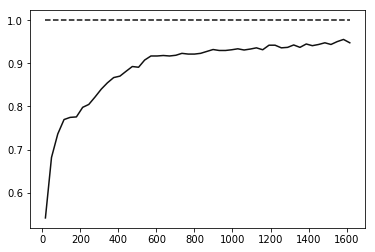

In [22]:
# 그래프 생성

plt.plot(train_sizes, train_mean, '--', color="#111111",label='Training score')
plt.plot(train_sizes, test_mean, color= '#111111', label='Cross-Validation score')

plt.show()
                                                        
                                     

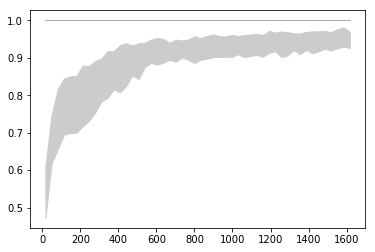

In [45]:
# 표준 편차 영역을 그림
plt.fill_between(train_sizes, train_mean-train_std,train_mean+train_std, color="#AAAAAA")

plt.fill_between(train_sizes, test_mean-test_std,test_mean+test_std, color="#CCCCCC")

                                             
    
plt.show()   

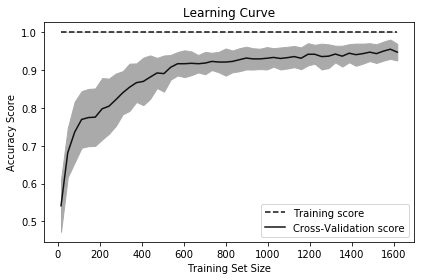

In [46]:
# 그래프 생성

plt.plot(train_sizes, train_mean, '--', color="#111111",label='Training score')
plt.plot(train_sizes, test_mean, color= '#111111', label='Cross-Validation score')
# 표준 편차 영역을 그림
plt.fill_between(train_sizes, train_mean-train_std,train_mean+train_std, color="#DDDDDD")

plt.fill_between(train_sizes, test_mean-test_std,test_mean+test_std, color="#AAAAAA")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()                   

학습 곡선은 훈련 세트의 샘플 수가 증가함에 따라 훈련 세트와 교차검증의 성능(예로, 정확도나 재현율을)시각화 함. 더 많은 훈련 데이터를 모아서 학습 알고리즘에 도움될지 결정하는 데 널리 사용. 해결에서 훈련 세트 샘플의 1%에서 100%까지 50개 크기에서 랜덤 포레스트 분류기의 정확도를 그래프로 그림. 모델의 교차검증 정확도가 증가하면 추가적인 샘플이 도움을 줌.(실전에서는 샘플을 더 모으는 것이 불가능할 수 있음.)

사이킷런 문서 : Learning Curve (http://bit.ly/2FwjBve)

# 11.12 평가 지표 리포트 만들기

분류기 성능을 간단하게 요약 - classification_report 사용

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LinearRegression으로 하면 오류남!!
from sklearn import datasets
from sklearn.metrics import classification_report

iris = datasets.load_iris()

X= iris.data
Y= iris.target

In [55]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [56]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
class_names = iris.target_names

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)


classifier = LogisticRegression() # LinearRegression으로 하면 오류남!!

model =classifier.fit(X_train,Y_train)
Y_predicted = model.predict(X_test)

# 분류 리포트를 생성
print(classification_report(Y_test,Y_predicted, target_names= class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 11.13 하이퍼파라미터 값의 영향을 시각화하기

일부 하이퍼파라미터 값을 변경할 때 모델의 성능 변화를 확인 - 검증 곡선 (Validation curve)사용.

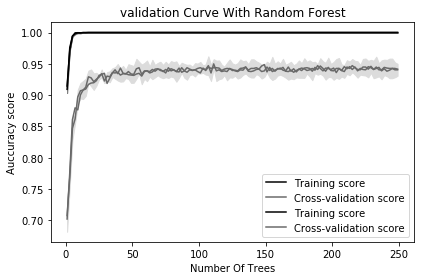

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 데이터를 로드합니다.
digits = load_digits()

# 특성 행렬과 타깃 벡터 생성.
X,Y = digits.data, digits.target

# 파라미터 값의 범위를 만듬
param_range = np.arange(1,250,2)

# 파라미터 값의 범위를 사용해 훈련 세트와 테스트 세트의 정확도를 계산.
train_scores, test_scores = validation_curve(RandomForestClassifier(), # 분류기
                                            X, #특성행렬
                                            Y, # 타깃 벡터
                                            param_name='n_estimators', #조사할 하이퍼 파라미터 
                                            param_range = param_range , # 하이퍼파라미터 값의 범위
                                            cv=3, # 폴드 수
                                            scoring='accuracy', # 성능 지표
                                            n_jobs = -1 # 모든 코어사용
                                            )

# 훈련 세트 점수의 평균과 표준편차를 계산

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준편차를 계산.
test_mean = np.mean(test_scores, axis =1)
test_std = np.std(test_scores, axis= 1)

# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그림
plt.plot(param_range,train_mean, label = "Training score", color = 'black')
plt.plot(param_range,test_mean, label = 'Cross-validation score', color = 'dimgrey')


# 훈련 세트와 테스트 세트의 정확도에 대한 표준편차 그래프로 그리기

plt.fill_between(param_range,train_mean-train_std,train_mean+train_std, color ='gray')
plt.fill_between(param_range,test_mean-test_std,test_mean+test_std, color ='gainsboro')

# 그래프 출력.
plt.title('validation Curve With Random Forest')
plt.xlabel('Number Of Trees')
plt.ylabel('Auccuracy score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [4]:
train_scores

array([[0.93489149, 0.90567613, 0.92070117],
       [0.97829716, 0.97412354, 0.97829716],
       [0.9933222 , 0.99499165, 0.99582638],
       [0.99833055, 0.99833055, 0.99916528],
       [0.99916528, 1.        , 0.99916528],
       [1.        , 1.        , 1.        ],
       [0.99916528, 1.        , 0.99916528],
       [1.        , 1.        , 0.99916528],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.

array([0.92042293, 0.97690595, 0.99471341, 0.99860879, 0.99944352,
       1.        , 0.99944352, 0.99972176, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

(이 책에서 다루는 여러 알고리즘을 포함해) 대부분의 훈련 알고리즘에는 훈련 과정을 시작하기 전에 선택해야만 하는 하이퍼파라미터가 있음. 예를 들어 랜덤 포레스트 분류기는 의사결정 트리의 앙상블(ensemble)을 만듬. 트리마다 샘플의 클래스를 예측. 랜덤 포레스트 분류기의 하이퍼파라미터는 앙상블을 할 트리의 개수. 많은 경우 하이퍼파라미터 값은 모델 선택(12장)과정을 통해 선택. 하지만 때로는 하이퍼파라미터 값의 변화에 따라 모델 성능의 변화를 시각화하는 것이 도움이 됌. 해결에서 트리 개수가 증가할 때 랜덤 포레스트 분류기의 훈련 세트 정확도와 교차검증 정확도의 변화를 그래프로 나타냄. 트리 개수가 적을 때는 훈련 세트의 점수와 교차 검증 점수가 모두 낮아 모델이 과소적합(underfit)되었음. 트리 개수를 250까지 증가하면 두 정확도 모두 변화가 없이 평탄해짐. 이 문제를 위해 대규모 랜덤 포레스트 모델을 훈련할 가치가 없음을 의미.

-사이킷런에서 validation_curve 함수로 검증 곡선을 계산가능. 이 함수의 중요한 파라미터 세 개는 다음과 같음.

1. param_name은 바꿀 하이퍼파라미터의 이름.

2. param_range는 사용할 하이퍼파라미터의 범위.

3. scoring은 모델을 평가하는 데 사용할 지표.

- 사이킷런 문서: 검증 곡선(http://bit.ly/2FuwYFG)

In [15]:
validation_curve?

In [13]:
train_scores.shape

(125, 3)

In [14]:
test_scores.shape

(125, 3)